## Implementação do artigo, visando um melhor entendimento para criação de um tutorial adequado para aqueles que pretendem reproduzí-lo.

### **Título:**
## Training and Meta-Training Binary Neural Networks with Quantum Computing

### **Autores:**
Fawaz, Abdulah, et al.

### **Grupo que criou o resumo e tutorial:**
André, Daivid e Felipe


## Inicializando o qiskit e verificando os backends disponíveis.

In [10]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *

In [11]:
## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

### **Vamos tentar montar o circuito do perceptron que foi apresentado no artigo**

Temos 1 perceptron que tem 3 entradas e uma saída, logo:

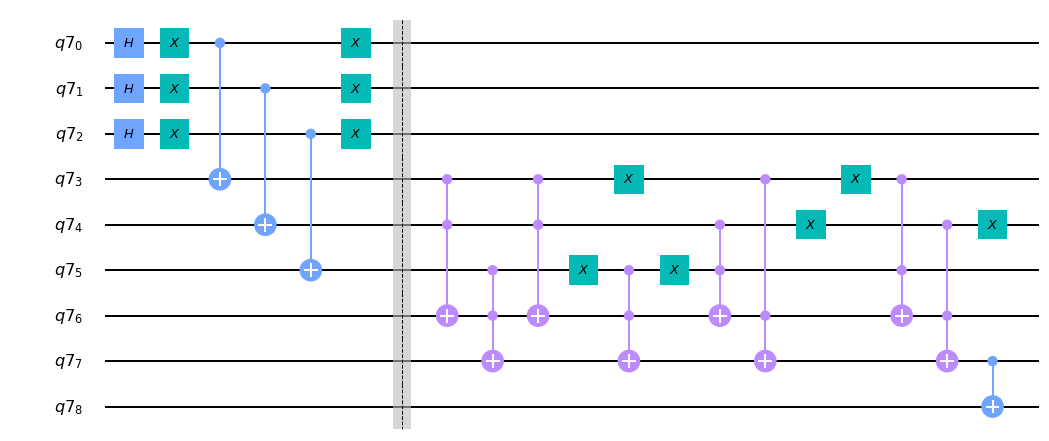

In [14]:
# Array com 8 bits quânticos
# Os 3 [0 - 2] primeiros representam pesos
# Os 3 seguintes [3 - 5] representam inputs
# O penúltimo uma ancila e o último o qubit resultante
# Note que o Qubit resultante é o resultado após a função de ativação

# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, )

# just define a multiply function to not repeat this code
def multiplyWeightInput(circuit, x, y):
    circuit.h(x)
    circuit.x(x)
    circuit.cx(x, y)
    circuit.x(x)

# Então, aqui temos a implementação de um perceptron com 3 entradas.
multiplyWeightInput(circuit, qWI[0], qWI[3])
multiplyWeightInput(circuit, qWI[1], qWI[4])
multiplyWeightInput(circuit, qWI[2], qWI[5])
circuit.barrier()
circuit.ccx(qWI[3], qWI[4], qWI[6])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.ccx(qWI[3], qWI[4], qWI[6])
circuit.x(qWI[5])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.ccx(qWI[4], qWI[5], qWI[6])
circuit.x(qWI[3])
circuit.ccx(qWI[3], qWI[6], qWI[7])
circuit.x(qWI[3])
circuit.ccx(qWI[3], qWI[5], qWI[6])
circuit.x(qWI[4])
circuit.ccx(qWI[4], qWI[6], qWI[7])
circuit.x(qWI[4])
circuit.cx(qWI[7], qWI[8])
# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")